In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRFClassifier

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

In [3]:
df = pd.read_csv(r"C:\Users\User\Downloads\CS3264\music genre\feature.csv")
df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.350129,0.088772,0.130184,0.002828,1784.122641,129745.484419,2002.412407,85834.410406,3805.723030,9.012529e+05,...,52.424534,-1.687854,36.535866,-0.408730,41.603172,-2.302677,55.053654,1.222467,46.941349,blues
1,0.340849,0.094976,0.095908,0.002373,1530.261767,375915.508778,2038.987608,213905.103191,3550.713616,2.978311e+06,...,55.337963,-0.728403,60.231407,0.296872,48.133213,-0.282430,51.106014,0.530644,45.788700,blues
2,0.363538,0.085257,0.175473,0.002751,1552.832481,156471.010904,1747.754087,76295.413398,3042.410115,7.841309e+05,...,40.641678,-7.724839,47.629646,-1.819024,52.393604,-3.440457,46.643394,-2.238127,30.653151,blues
3,0.404854,0.093999,0.141040,0.006348,1070.153418,184366.009438,1596.422564,166551.844243,2184.879029,1.493078e+06,...,44.432903,-3.324069,50.218452,0.636311,37.325726,-0.615968,37.257774,-3.405046,31.965258,blues
4,0.308526,0.087843,0.091501,0.002305,1835.128513,343249.495746,1748.410758,88378.704478,3579.957471,1.572336e+06,...,85.995201,-5.451786,75.276741,-0.915952,53.633236,-4.408018,62.882484,-11.704385,55.190254,blues


# Probably need to do some data cleaning, KIV first

In [4]:
# Getting y and X from the df, where y is the label column, and X is all other columns

y = df["label"]
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X = df.iloc[:, :-1]

# print(X.head())
# print(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=34)

In [8]:
# Normalising values of features so that every value is between 0 and 1

min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled_arr = min_max_scaler.fit_transform(X_train)
X_test_scaled_arr = min_max_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled_arr, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled_arr, columns = X_test.columns)
# print(X)

# Playing around with some models

In [12]:
# Function to train and test various ML models, before outputting accuracy score

def model_scores(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy Score for " + model_name + " :" + str(round(accuracy_score(y_test, y_pred), 7)))
    print("F1 Score for " + model_name + " :" + str(round(f1_score(y_test, y_pred, average='weighted'), 7)))

In [10]:
#Try radial basis function network

In [14]:
# https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend

# Naive Bayes
nb = GaussianNB()
model_scores(nb, "Naive Bayes", X_train, X_test, y_train, y_test)

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_scores(sgd, "Stochastic Gradient Descent", X_train, X_test, y_train, y_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_scores(knn, "KNN", X_train, X_test, y_train, y_test)

# Decission trees
tree = DecisionTreeClassifier()
model_scores(tree, "Decission trees", X_train, X_test, y_train, y_test)

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_scores(rforest, "Random Forest", X_train, X_test, y_train, y_test)

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_scores(svm, "Support Vector Machine", X_train, X_test, y_train, y_test)

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_scores(lg, "Logistic Regression", X_train, X_test, y_train, y_test)

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_scores(nn, "Neural Nets", X_train, X_test, y_train, y_test)

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_scores(xgb, "Cross Gradient Booster", X_train, X_test, y_train, y_test)

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_scores(xgbrf, "Cross Gradient Booster (Random Forest)", X_train, X_test, y_train, y_test)

Accuracy Score for Naive Bayes :0.5533333
F1 Score for Naive Bayes :0.5424399
Accuracy Score for Stochastic Gradient Descent :0.59
F1 Score for Stochastic Gradient Descent :0.6008001
Accuracy Score for KNN :0.5966667
F1 Score for KNN :0.5958235
Accuracy Score for Decission trees :0.4766667
F1 Score for Decission trees :0.4808788
Accuracy Score for Random Forest :0.69
F1 Score for Random Forest :0.691296
Accuracy Score for Support Vector Machine :0.6666667
F1 Score for Support Vector Machine :0.6627159
Accuracy Score for Logistic Regression :0.6433333
F1 Score for Logistic Regression :0.6351207


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-l

Accuracy Score for Neural Nets :0.6966667
F1 Score for Neural Nets :0.6948956
Accuracy Score for Cross Gradient Booster :0.6733333
F1 Score for Cross Gradient Booster :0.6732855
Accuracy Score for Cross Gradient Booster (Random Forest) :0.6
F1 Score for Cross Gradient Booster (Random Forest) :0.5963907


# Hyperparameters tuning for knn and random forest

In [9]:
import optuna
from optuna.trial import TrialState

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### KNN

In [10]:
def define_knn_model(trial):
    
    n_neighbors = trial.suggest_int("n_neighbors", 1, 10)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    algorithm = trial.suggest_categorical("algorithm", ["auto", "ball_tree", "kd_tree", "brute"])
    leaf_size = trial.suggest_int("leaf_size", 10, 50)
    p = trial.suggest_categorical("p", [1, 2])

    return KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p)

def knn_objective(trial):
    # Generate the model.
    model = define_knn_model(trial)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
        
    return accuracy

In [11]:
study = optuna.create_study(direction="maximize")
study.optimize(knn_objective, n_trials=1000, timeout=1600)

# pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
# print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-04-19 15:00:24,126] A new study created in memory with name: no-name-95733011-6f29-4ab3-83b3-122d65592c6a
[I 2024-04-19 15:00:24,283] Trial 0 finished with value: 0.71 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 24, 'p': 2}. Best is trial 0 with value: 0.71.
[I 2024-04-19 15:00:24,298] Trial 1 finished with value: 0.7 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 27, 'p': 1}. Best is trial 0 with value: 0.71.
[I 2024-04-19 15:00:24,311] Trial 2 finished with value: 0.67 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 39, 'p': 2}. Best is trial 0 with value: 0.71.
[I 2024-04-19 15:00:24,328] Trial 3 finished with value: 0.72 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 34, 'p': 1}. Best is trial 3 with value: 0.72.
[I 2024-04-19 15:00:24,346] Trial 4 finished with value: 0.68 and parameters:

Study statistics: 
  Number of finished trials:  1000
  Number of complete trials:  1000
Best trial:
  Value:  0.78
  Params: 
    n_neighbors: 5
    weights: distance
    algorithm: ball_tree
    leaf_size: 45
    p: 2


### Random Forest

In [12]:
def define_rf_model(trial):

    n_estimators = trial.suggest_int("n_estimators", 10, 500)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

    return RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_features=max_features, random_state=34)

def rf_objective(trial):
    # Generate the model.
    model = define_rf_model(trial)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
        
    return accuracy

In [13]:
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(rf_objective, n_trials=1000, timeout=1600)

# pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials_rf = study_rf.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study_rf.trials))
# print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials_rf))

print("Best trial:")
trial_rf = study_rf.best_trial

print("  Value: ", trial_rf.value)

print("  Params: ")
for key, value in trial_rf.params.items():
    print("    {}: {}".format(key, value))

[I 2024-04-19 15:01:35,397] A new study created in memory with name: no-name-dbab7104-04f7-4d0d-a35e-05bcdf3098b6
[I 2024-04-19 15:01:41,218] Trial 0 finished with value: 0.7 and parameters: {'n_estimators': 91, 'criterion': 'log_loss', 'max_features': None}. Best is trial 0 with value: 0.7.
[I 2024-04-19 15:01:43,866] Trial 1 finished with value: 0.74 and parameters: {'n_estimators': 41, 'criterion': 'entropy', 'max_features': None}. Best is trial 1 with value: 0.74.
[I 2024-04-19 15:01:45,311] Trial 2 finished with value: 0.74 and parameters: {'n_estimators': 194, 'criterion': 'log_loss', 'max_features': 'log2'}. Best is trial 1 with value: 0.74.
[I 2024-04-19 15:01:48,599] Trial 3 finished with value: 0.76 and parameters: {'n_estimators': 438, 'criterion': 'log_loss', 'max_features': 'log2'}. Best is trial 3 with value: 0.76.
[I 2024-04-19 15:01:49,156] Trial 4 finished with value: 0.75 and parameters: {'n_estimators': 57, 'criterion': 'entropy', 'max_features': 'sqrt'}. Best is tri

Study statistics: 
  Number of finished trials:  791
  Number of complete trials:  791
Best trial:
  Value:  0.81
  Params: 
    n_estimators: 155
    criterion: log_loss
    max_features: sqrt


# Calculating accuracy and F1 scores for KNN and RF using best hyperparameters

In [14]:
knn_final_model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='ball_tree', leaf_size=45, p=2)
knn_final_model.fit(X_train, y_train)
y_pred = knn_final_model.predict(X_test)

print("Accuracy Score for " + "KNN" + " :" + str(round(accuracy_score(y_test, y_pred), 7)))
print("F1 Score for " + "KNN" + " :" + str(round(f1_score(y_test, y_pred, average='weighted'), 7)))

Accuracy Score for KNN :0.78
F1 Score for KNN :0.7787888


In [15]:
rf_final_model = RandomForestClassifier(n_estimators=155, criterion="log_loss", max_features="sqrt", random_state=34)
rf_final_model.fit(X_train, y_train)
y_pred = rf_final_model.predict(X_test)

print("Accuracy Score for " + "Random Forest Classifier" + " :" + str(round(accuracy_score(y_test, y_pred), 7)))
print("F1 Score for " + "Random Forest Classifier" + " :" + str(round(f1_score(y_test, y_pred, average='weighted'), 7)))

Accuracy Score for Random Forest Classifier :0.81
F1 Score for Random Forest Classifier :0.8110119


# ***Everything else from here on are rough workings, can ignore

In [ ]:
# https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/

# Automated Hyperparameter Tuning: Bayesian Hyperparameter Optimisation:
### https://towardsdatascience.com/automated-machine-learning-hyperparameter-tuning-in-python-dfda59b72f8a
### https://github.com/WillKoehrsen/hyperparameter-optimization/blob/master/Bayesian%20Hyperparameter%20Optimization%20of%20Gradient%20Boosting%20Machine.ipynb

In [15]:
# Creating a Multi-Layer Perceptron Neural Network Classifier
mlp_nn = MLPClassifier(random_state=34, max_iter=10000, early_stopping=True, n_iter_no_change=100)
# mlp_nn.get_params()

## Accuracy score using default hyperparameters for MLPClassifier

In [16]:
from sklearn.metrics import accuracy_score
from timeit import default_timer as timer

start = timer()
mlp_nn.fit(X_train, y_train)
train_time = timer() - start

y_pred = mlp_nn.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

print('The baseline score on the test set is {:.4f}.'.format(acc_score))
print('The baseline training time is {:.4f} seconds'.format(train_time))

The baseline score on the test set is 0.6333.
The baseline training time is 0.8855 seconds


## Accuracy score for randomised search of hyperparameter grid

In [17]:
import numpy as np

param_grid = {
    'hidden_layer_sizes': [(100,), (10,30,10), (20,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': list(np.logspace(np.log(0.001), np.log(0.2), base = np.exp(1), num = 1000)),
    # 'max_iter': list(range(200, 500))
}

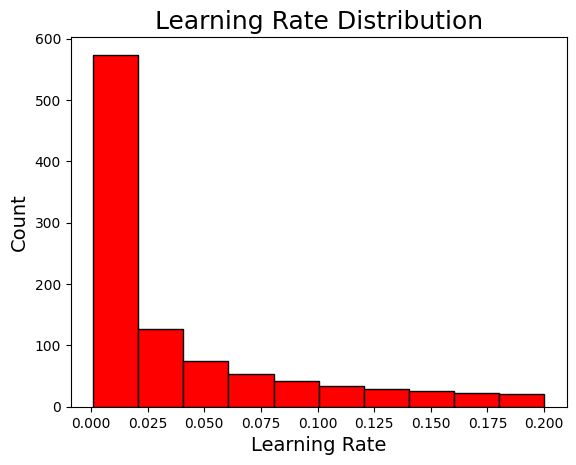

In [19]:
import matplotlib.pyplot as plt

plt.hist(param_grid['learning_rate_init'], color = 'r', edgecolor = 'k')
plt.xlabel('Learning Rate', size = 14); plt.ylabel('Count', size = 14); plt.title('Learning Rate Distribution', size = 18)

In [20]:
MAX_EVALS = 500

# Dataframe to hold cv results
random_results = pd.DataFrame(columns = ['loss', 'params', 'iteration', 'time'], index = list(range(MAX_EVALS)))

In [21]:
# K-fold implementation for MLPClassifier: https://stackoverflow.com/questions/44683197/implement-k-fold-cross-validation-in-mlpclassification-python

from sklearn.model_selection import KFold

N_FOLDS = 10
FIXED_PARAMS = {'random_state':34, 'max_iter':100000, 'early_stopping':True, 'n_iter_no_change':100}

def random_objective(params, iteration, n_folds = N_FOLDS):
    """Random search objective function. Takes in hyperparameters
       and returns a list of results to be saved."""

    total_acc_scores = 0

    start = timer()
    # print("FIXED_HYPERPARAMS = {}".format(FIXED_HYPERPARAMS))
    total_params = dict(FIXED_PARAMS)
    total_params.update(params)
    print(total_params)
    # print("total_hyperparams = {}".format(total_hyperparams))
    mlp_nn = MLPClassifier(**total_params)
    # Perform n_folds cross validation
    # kf = KFold(n_splits=n_folds, shuffle=True, random_state=34)
    kf = KFold(n_splits=n_folds)
    for train_indices, test_indices in kf.split(X_train):
      train_indices = train_indices.tolist()
      test_indices = test_indices.tolist()

      X_train_train = X_train.loc[train_indices]
      y_train_train = y_train[train_indices]
      X_train_test = X_train.loc[test_indices]
      y_train_test = y_train[test_indices]

      mlp_nn.fit(X_train_train, y_train_train)
      acc_score = mlp_nn.score(X_train_test, y_train_test)

      # print("Accuracy scores = {}".format(acc_score))
      # print("Shape of X_train = {}".format(X_train.shape))
      # print("Length of train indices = {}".format(len(train_indices)))
      # print("Length of test indices = {}".format(len(test_indices)))
      total_acc_scores += acc_score

    end = timer()
    avg_score = total_acc_scores / n_folds

    # Loss must be minimized
    loss = 1 - avg_score

    # Return list of results
    return [loss, total_params, iteration, end - start]

In [22]:
import random

random.seed(34)

# Iterate through the specified number of evaluations
for i in range(MAX_EVALS):
    print(i)
    # Randomly sample parameters for gbm
    params = {key: random.sample(value, 1)[0] for key, value in param_grid.items()}

    # print(params)

    results_list = random_objective(params, i)

    # Add results to next row in dataframe
    random_results.loc[i, :] = results_list

0
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (20,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate': 'constant', 'learning_rate_init': 0.131542673006712}
1
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'learning_rate_init': 0.17892045575368126}
2
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0001, 'learning_rate': 'constant', 'learning_rate_init': 0.004415026677515173}
3
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.00

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


17
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.05, 'learning_rate': 'invscaling', 'learning_rate_init': 0.013662913889195903}
18
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.028105846105493354}
19
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (20,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate': 'constant', 'learning_rate_init': 0.004322350677427307}
20
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'learning_rate_ini

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


57
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'learning_rate_init': 0.0027247709421191766}
58
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.06428603838336944}
59
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.05, 'learning_rate': 'invscaling', 'learning_rate_init': 0.004987811115027003}
60
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'learning_rate_init':

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


97
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.05, 'learning_rate': 'invscaling', 'learning_rate_init': 0.07497445712440118}
98
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (20,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0967104334094272}
99
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.008387579796571582}
100
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


146
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.05, 'learning_rate': 'invscaling', 'learning_rate_init': 0.02665405752277871}
147
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.05, 'learning_rate': 'constant', 'learning_rate_init': 0.06462789289781588}
148
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.05, 'learning_rate': 'constant', 'learning_rate_init': 0.0017268051407205711}
149
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'learning_rate_init':

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


239
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.03141714119506435}
240
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (20,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.05, 'learning_rate': 'constant', 'learning_rate_init': 0.08837240271908324}
241
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.0001, 'learning_rate': 'constant', 'learning_rate_init': 0.0105921307088264}
242
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.05, 'learning_rate': 'constant', 'learning_rate_init': 0.0056349

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05, 'learning_rate': 'constant', 'learning_rate_init': 0.04506022232868119}
251
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0041869714430725295}
252
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0011912694373111834}
253
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.05, 'learning_rate': 'constant', 'learnin

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


255
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.05, 'learning_rate': 'invscaling', 'learning_rate_init': 0.016449776350732106}
256
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.02679579607319518}
257
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.026233324455100338}
258
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.05, 'learning_rate': 'invscaling', 'learning

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


449
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate': 'constant', 'learning_rate_init': 0.003590073435981314}
450
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.0001, 'learning_rate': 'constant', 'learning_rate_init': 0.0038667847656626364}


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


451
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001663872330178881}
452
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.05630323257877125}
453
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0519976037461074}
454
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'learning_rate_init': 0.

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


458
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0013175688937687932}
459
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (20,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05, 'learning_rate': 'invscaling', 'learning_rate_init': 0.09026720520351134}
460
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (20,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.05, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001135742819860577}
461
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'hidden_layer_sizes': (10, 30, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0054

In [23]:
# Sort results by best validation score
random_results.sort_values('loss', ascending = True, inplace = True)
random_results.reset_index(inplace = True, drop = True)
random_results.head()

,loss,params,iteration,time
0,0.268571,"{'random_state': 34, 'max_iter': 100000, 'earl...",258,57.140155
1,0.268571,"{'random_state': 34, 'max_iter': 100000, 'earl...",476,56.267439
2,0.268571,"{'random_state': 34, 'max_iter': 100000, 'earl...",286,56.273107
3,0.268571,"{'random_state': 34, 'max_iter': 100000, 'earl...",262,56.381071
4,0.268571,"{'random_state': 34, 'max_iter': 100000, 'earl...",143,57.03763


In [24]:
# Use the best parameters to create MLPClassifier model
best_random_params = random_results.loc[0, 'params'].copy()
best_random_model = MLPClassifier(**best_random_params)

# Fit on the training data
best_random_model.fit(X_train, y_train)

# Compute acc score for test set
acc_score = best_random_model.score(X_test, y_test)

print('The best model from random search scores {:.4f} on the test data.'.format(acc_score))
print('This was achieved using {} search iterations.'.format(random_results.loc[0, 'iteration']))

The best model from random search scores 0.7533 on the test data.
This was achieved using 258 search iterations.


# Accuracy score for Bayesian Hyperparameter Optimisation using Hyperopt

In [25]:
import csv
from hyperopt import STATUS_OK
from timeit import default_timer as timer

global ITERATION

ITERATION = 0   # Global variable

def objective(params, n_folds = N_FOLDS):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization"""

    # Keep track of evals
    global ITERATION

    ITERATION += 1

    total_acc_scores = 0

    start = timer()

    total_params = dict(FIXED_PARAMS)
    total_params.update(params)
    print(total_params)
    mlp_nn = MLPClassifier(**total_params)

    # Perform n_folds cross validation
    kf = KFold(n_splits=n_folds)
    for train_indices, test_indices in kf.split(X_train):
      train_indices = train_indices.tolist()
      test_indices = test_indices.tolist()

      X_train_train = X_train.loc[train_indices]
      y_train_train = y_train[train_indices]
      X_train_test = X_train.loc[test_indices]
      y_train_test = y_train[test_indices]

      mlp_nn.fit(X_train_train, y_train_train)
      acc_score = mlp_nn.score(X_train_test, y_train_test)

      # print("Accuracy scores = {}".format(acc_score))
      # print("Shape of X_train = {}".format(X_train.shape))
      # print("Length of train indices = {}".format(len(train_indices)))
      # print("Length of test indices = {}".format(len(test_indices)))
      total_acc_scores += acc_score

    run_time = timer() - start
    avg_score = total_acc_scores / n_folds

    # Loss must be minimized
    loss = 1 - avg_score

    # Write to the csv file ('a' means append)
    of_connection = open(out_file, 'a')   # out_file defined below
    writer = csv.writer(of_connection)
    writer.writerow([loss, total_params, ITERATION, run_time])

    # Dictionary with information for evaluation
    return {'loss': loss, 'params': total_params, 'iteration': ITERATION,
            'train_time': run_time, 'status': STATUS_OK}

In [26]:
from hyperopt import hp
from hyperopt.pyll.stochastic import sample

In [27]:
space = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(100,), (10,30,10), (20,)]),
    'activation': hp.choice('activation', ['logistic', 'tanh', 'relu']),
    'solver': hp.choice('solver', ['lbfgs', 'sgd', 'adam']),
    'alpha': hp.choice('alpha', [0.0001, 0.05]),
    'learning_rate': hp.choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
    'learning_rate_init': hp.loguniform('learning_rate_init', np.log(0.001), np.log(0.2))
}

In [29]:
# Tree-Parzen Estimator approach: https://papers.nips.cc/paper/4443-algorithms-for-hyper-parameter-optimization.pdf
from hyperopt import tpe
from hyperopt import Trials

# optimization algorithm
tpe_algorithm = tpe.suggest

# Keep track of results
bayes_trials = Trials()

# File to save first results
out_file = r"C:\Users\User\Downloads\CS3264\music genre\mlp_hyperparams.csv"
of_connection = open(out_file, 'w')
writer = csv.writer(of_connection)

# Write the headers to the file
writer.writerow(['loss', 'params', 'iteration', 'train_time'])
of_connection.close()

In [31]:
from hyperopt import fmin

# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest,
            max_evals = MAX_EVALS, trials = bayes_trials, rstate = np.random.default_rng(34))

{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.005782882522146636, 'solver': 'sgd'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001587260097684231, 'solver': 'sgd'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.01715846429604637, 'solver': 'adam'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'invscaling', 'learning_rate_init': 0.015695545060776857, 'sol

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.08838943406445651, 'solver': 'lbfgs'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.19533058907717762, 'solver': 'lbfgs'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.19958783507832226, 'solver': 'lbfgs'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.1596742330544411, 'solver

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.16074209240799048, 'solver': 'lbfgs'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.13384675140914917, 'solver': 'lbfgs'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.13926147031682864, 'solver': 'lbfgs'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.04452864900738183, 's

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.10117068074476585, 'solver': 'lbfgs'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.0037456230048665625, 'solver': 'adam'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.1507744124571699, 'solver': 'sgd'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.07321547069524578, 'solver': 'lbfgs'

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.06844357332467582, 'solver': 'adam'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.17071996294271052, 'solver': 'lbfgs'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.05500361741001147, 'solver': 'sgd'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.039490909022538934, 'solver': 'lbfgs'

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.008621918076546586, 'solver': 'lbfgs'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.053962335224100155, 'solver': 'lbfgs'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.06747689407969812, 'solver': 'sgd'}
{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.10741166609713036, 'solver': 'ad

KeyboardInterrupt: 

In [32]:
# Sort the trials with lowest loss (highest accuracy) first
bayes_trials_results = sorted(bayes_trials.results, key = lambda x: x['loss'])
bayes_trials_results[:2]

KeyError: 'loss'

In [33]:
# This is an alternative way to retrieve the best params and scores

results = pd.read_csv(r"C:\Users\User\Downloads\CS3264\music genre\mlp_hyperparams.csv")

# Sort with best scores on top and reset index for slicing
results.sort_values('loss', ascending = True, inplace = True)
results.reset_index(inplace = True, drop = True)
results.head()

,loss,params,iteration,train_time
0,0.260000,"{'random_state': 34, 'max_iter': 100000, 'earl...",36,8.247582
1,0.268571,"{'random_state': 34, 'max_iter': 100000, 'earl...",499,56.334743
2,0.268571,"{'random_state': 34, 'max_iter': 100000, 'earl...",406,62.461019
3,0.268571,"{'random_state': 34, 'max_iter': 100000, 'earl...",405,61.704521
4,0.268571,"{'random_state': 34, 'max_iter': 100000, 'earl...",404,60.664400


In [36]:
# Retrieve best params from results dataframe, and convert it from string back to dict
import ast

# Convert from a string to a dictionary
best_bayes_params = ast.literal_eval(results.loc[0, 'params']).copy()
print(best_bayes_params)

{'random_state': 34, 'max_iter': 100000, 'early_stopping': True, 'n_iter_no_change': 100, 'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.002047475750552013, 'solver': 'adam'}


In [35]:
# Re-create the best model and train on the training data
best_bayes_model = MLPClassifier(**best_bayes_params)

# Fit on the training data
best_bayes_model.fit(X_train, y_train)

# Evaluate on the testing data
# Compute acc score for test set
acc_score = best_bayes_model.score(X_test, y_test)
print('The best model from Bayes optimization scores {:.5f} on the test data.'.format(acc_score))
print('This was achieved after {} search iterations'.format(results.loc[0, 'iteration']))

The best model from Bayes optimization scores 0.65667 on the test data.
This was achieved after 36 search iterations
